# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
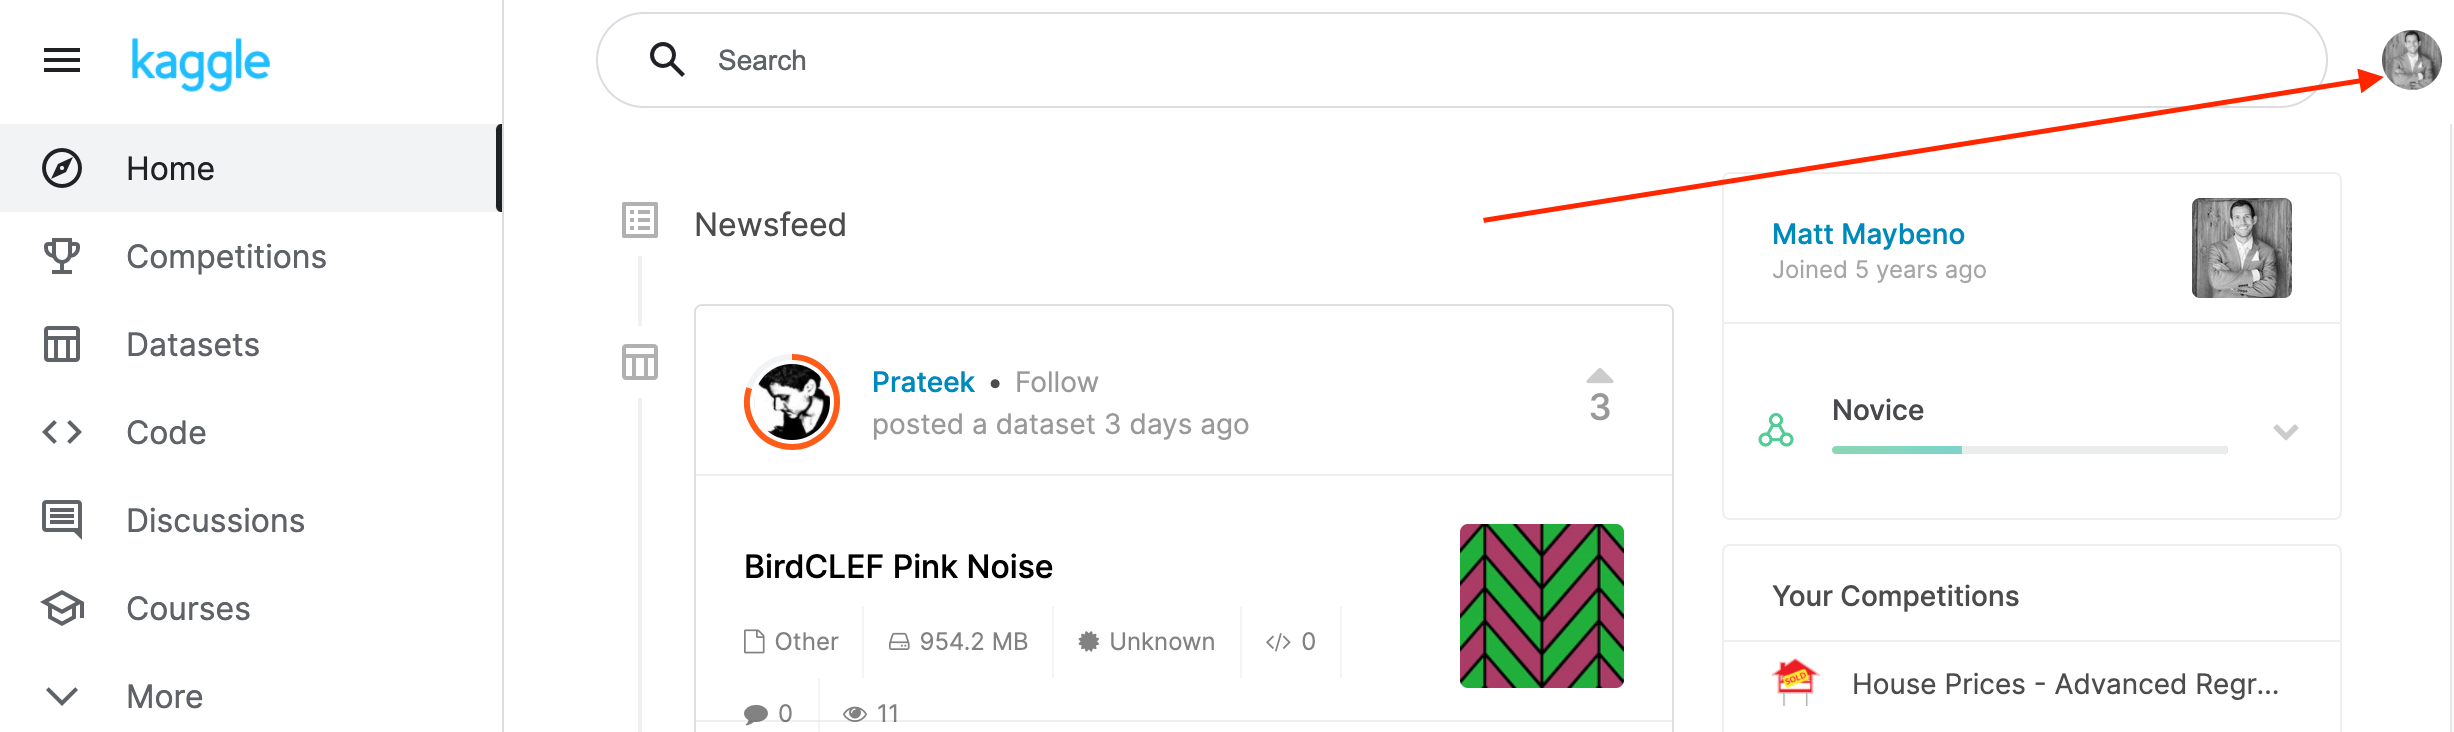
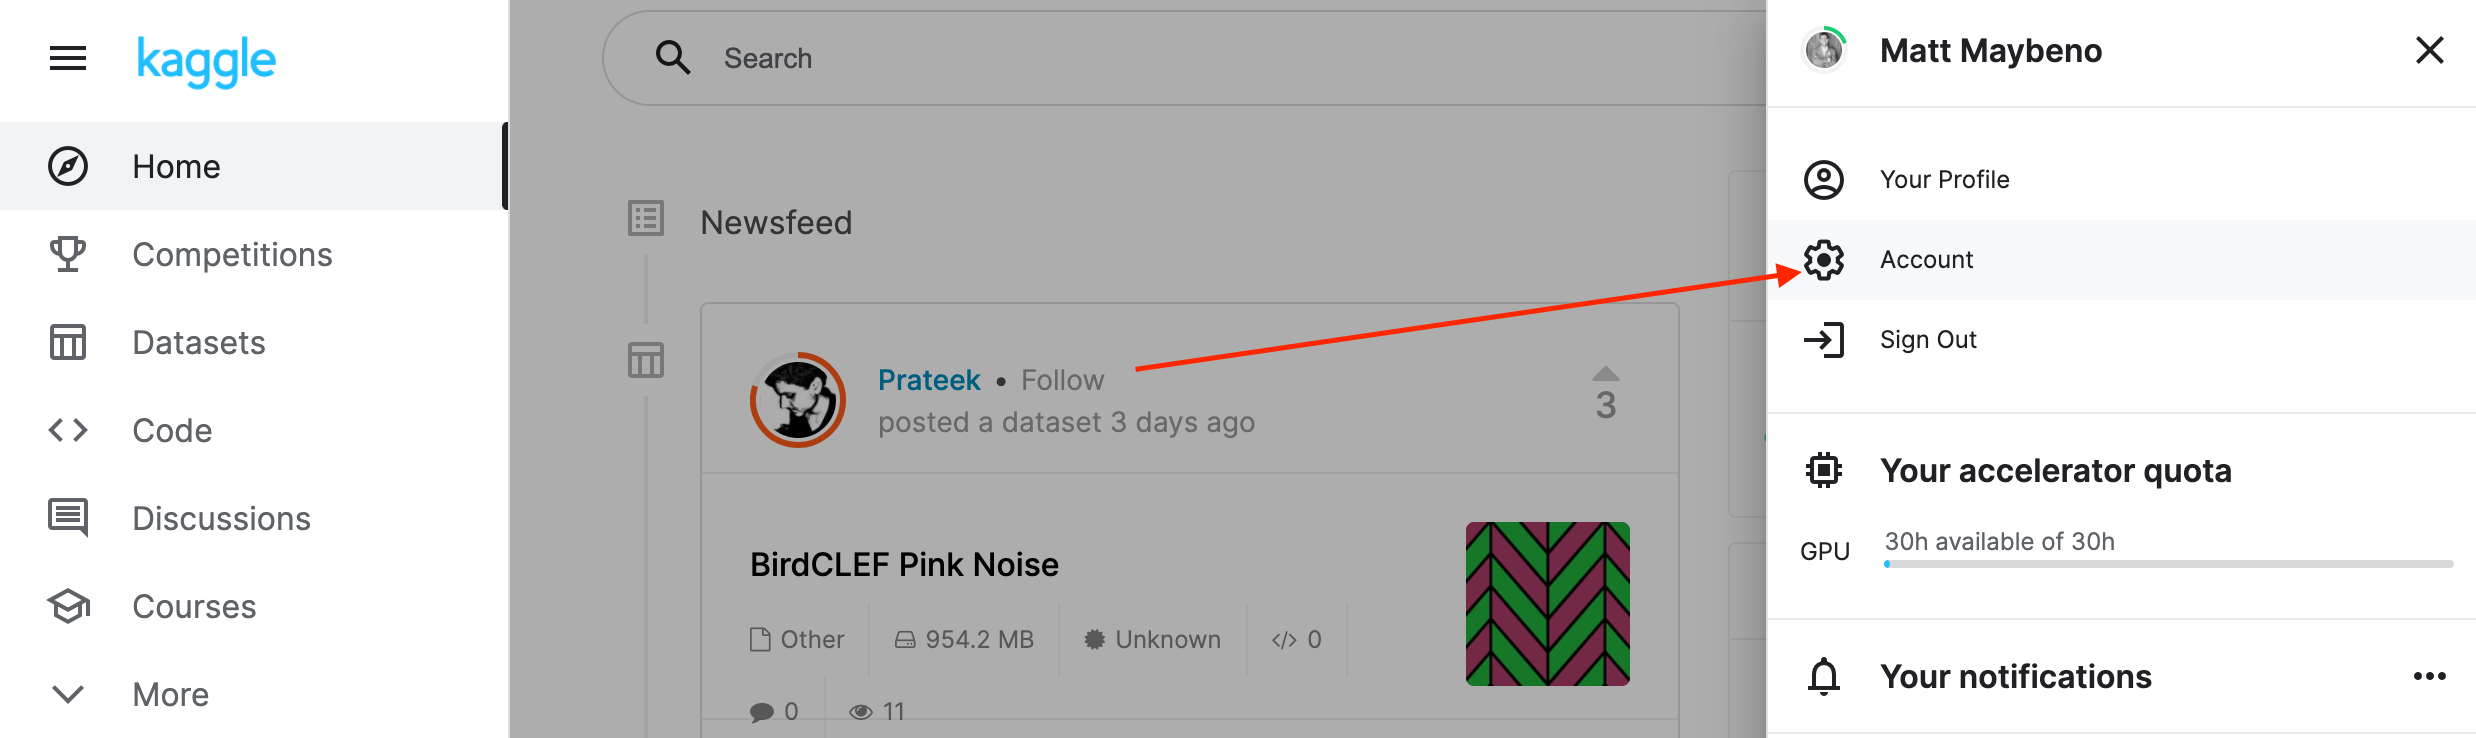
2. Scroll down to API and click Create New API Token.
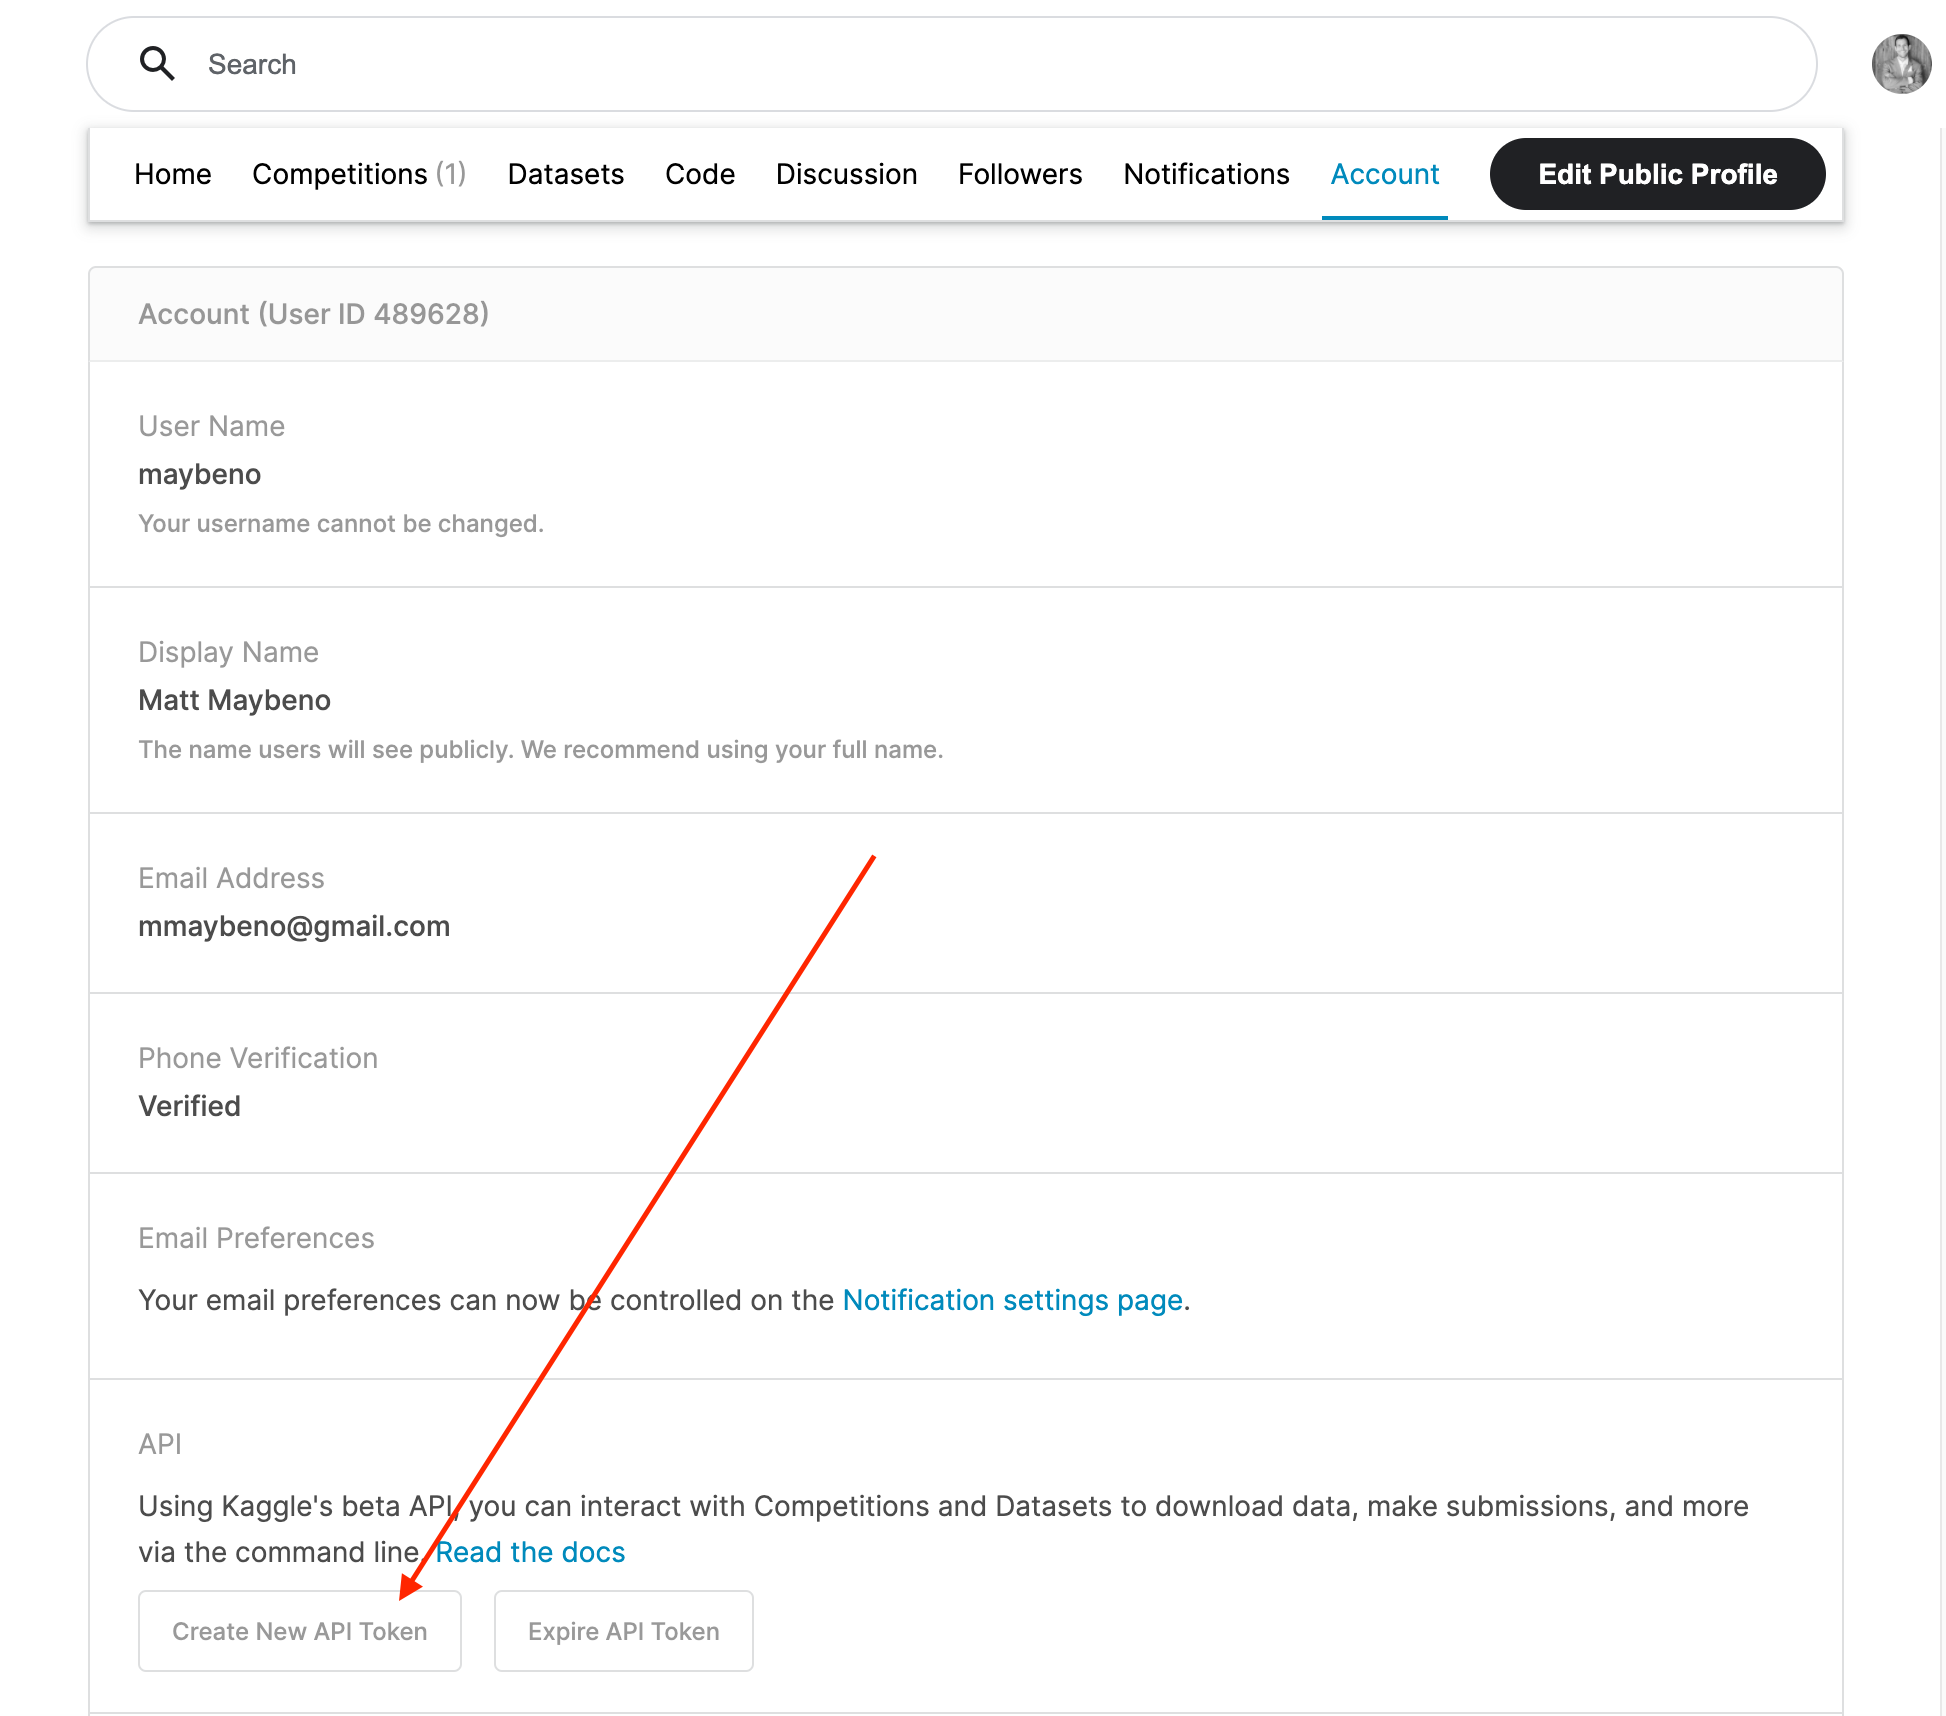
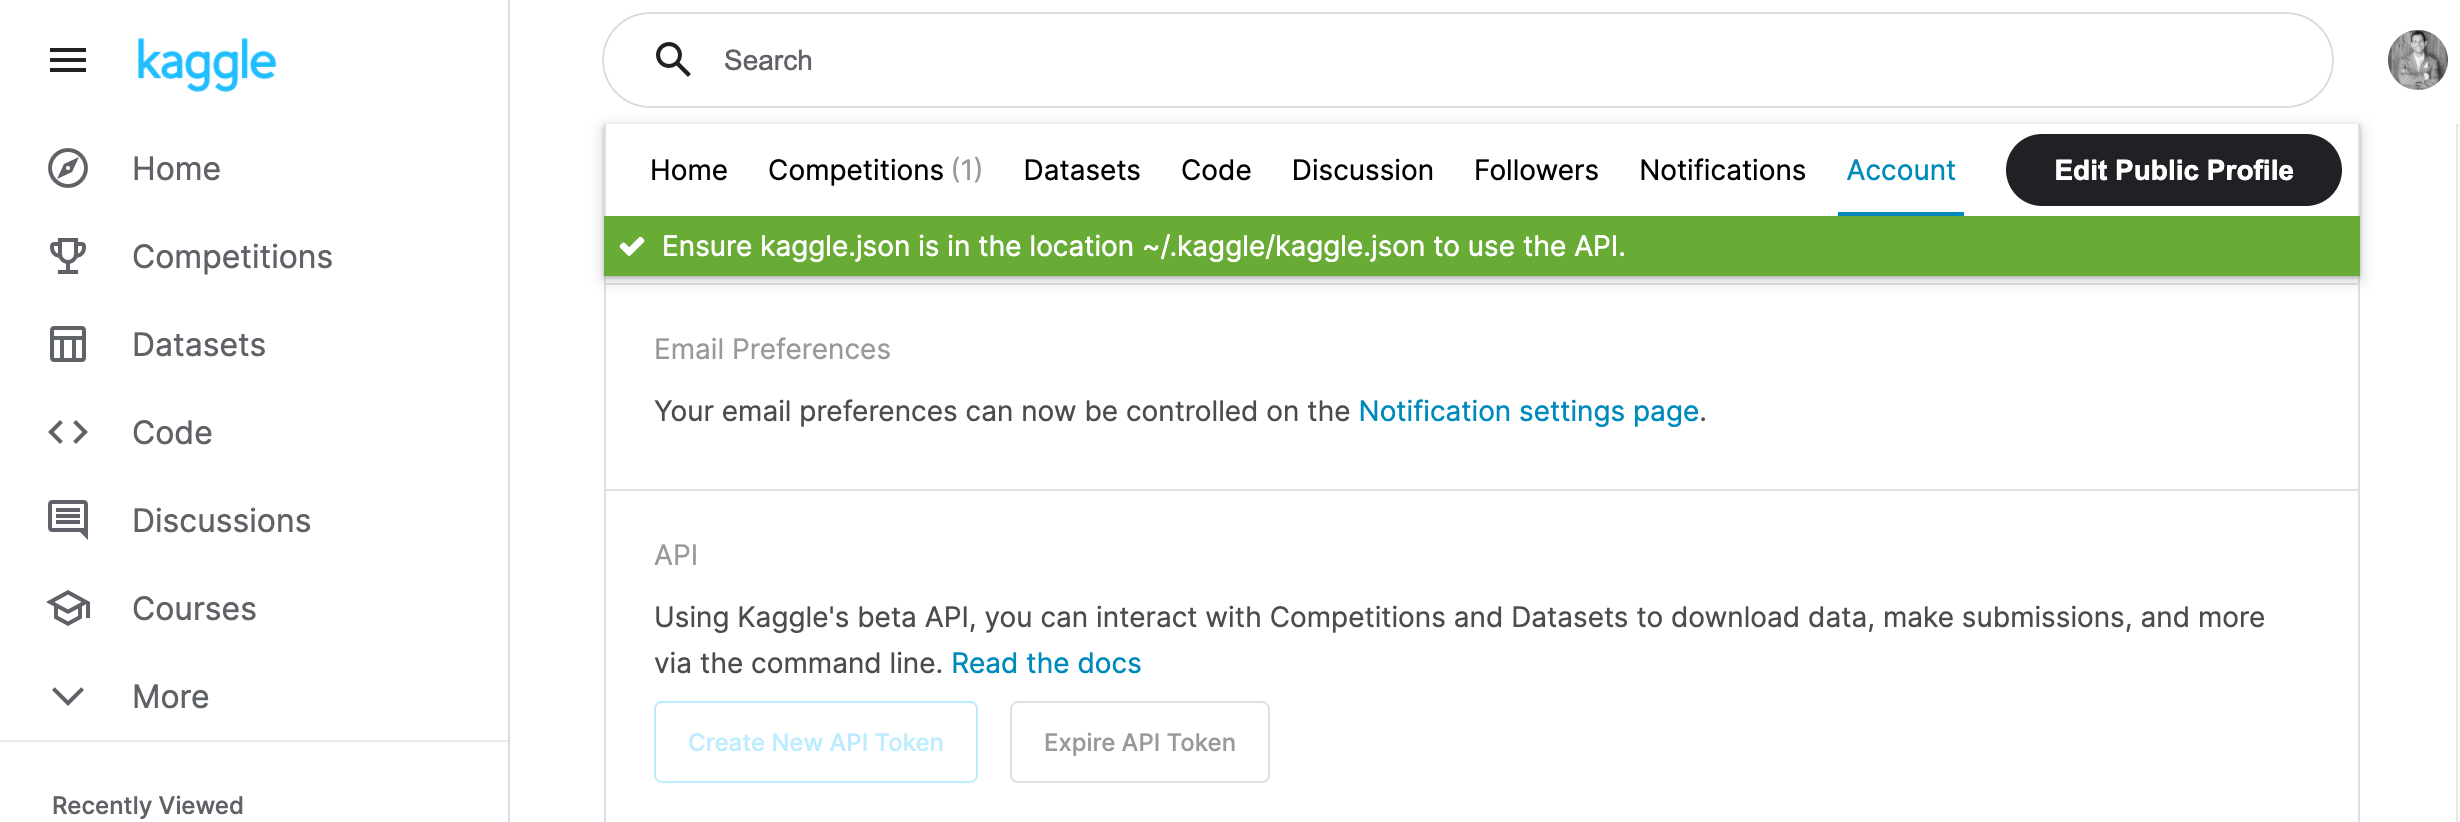
3. Open up `kaggle.json` and use the username and key.
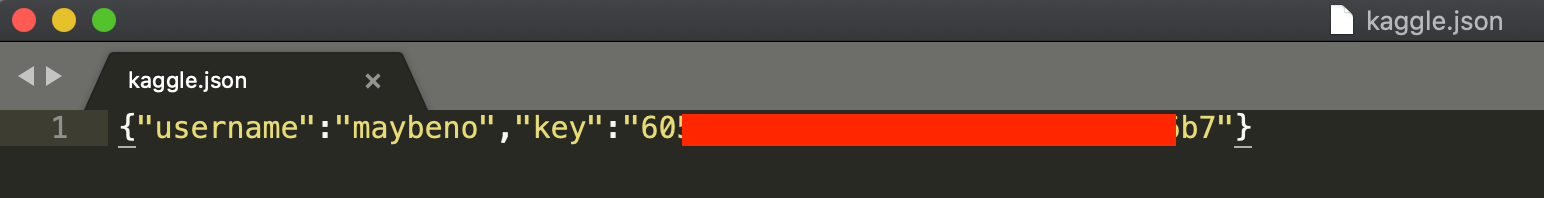

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-66.1.1-py3-none-any.whl (1.3 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.5/292.5 kB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.6/103.6 kB 195.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 162.9 MB/s eta 0:00:00
     ━━━━━━━━━━━

### Setup Kaggle API Key

In [3]:
!pip install kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-7.0.0-py2.py3-none-any.whl (9.4 kB)


In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "jf23perez"
kaggle_key = "02052e9d4ae34402b43e2321a0d40daa"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
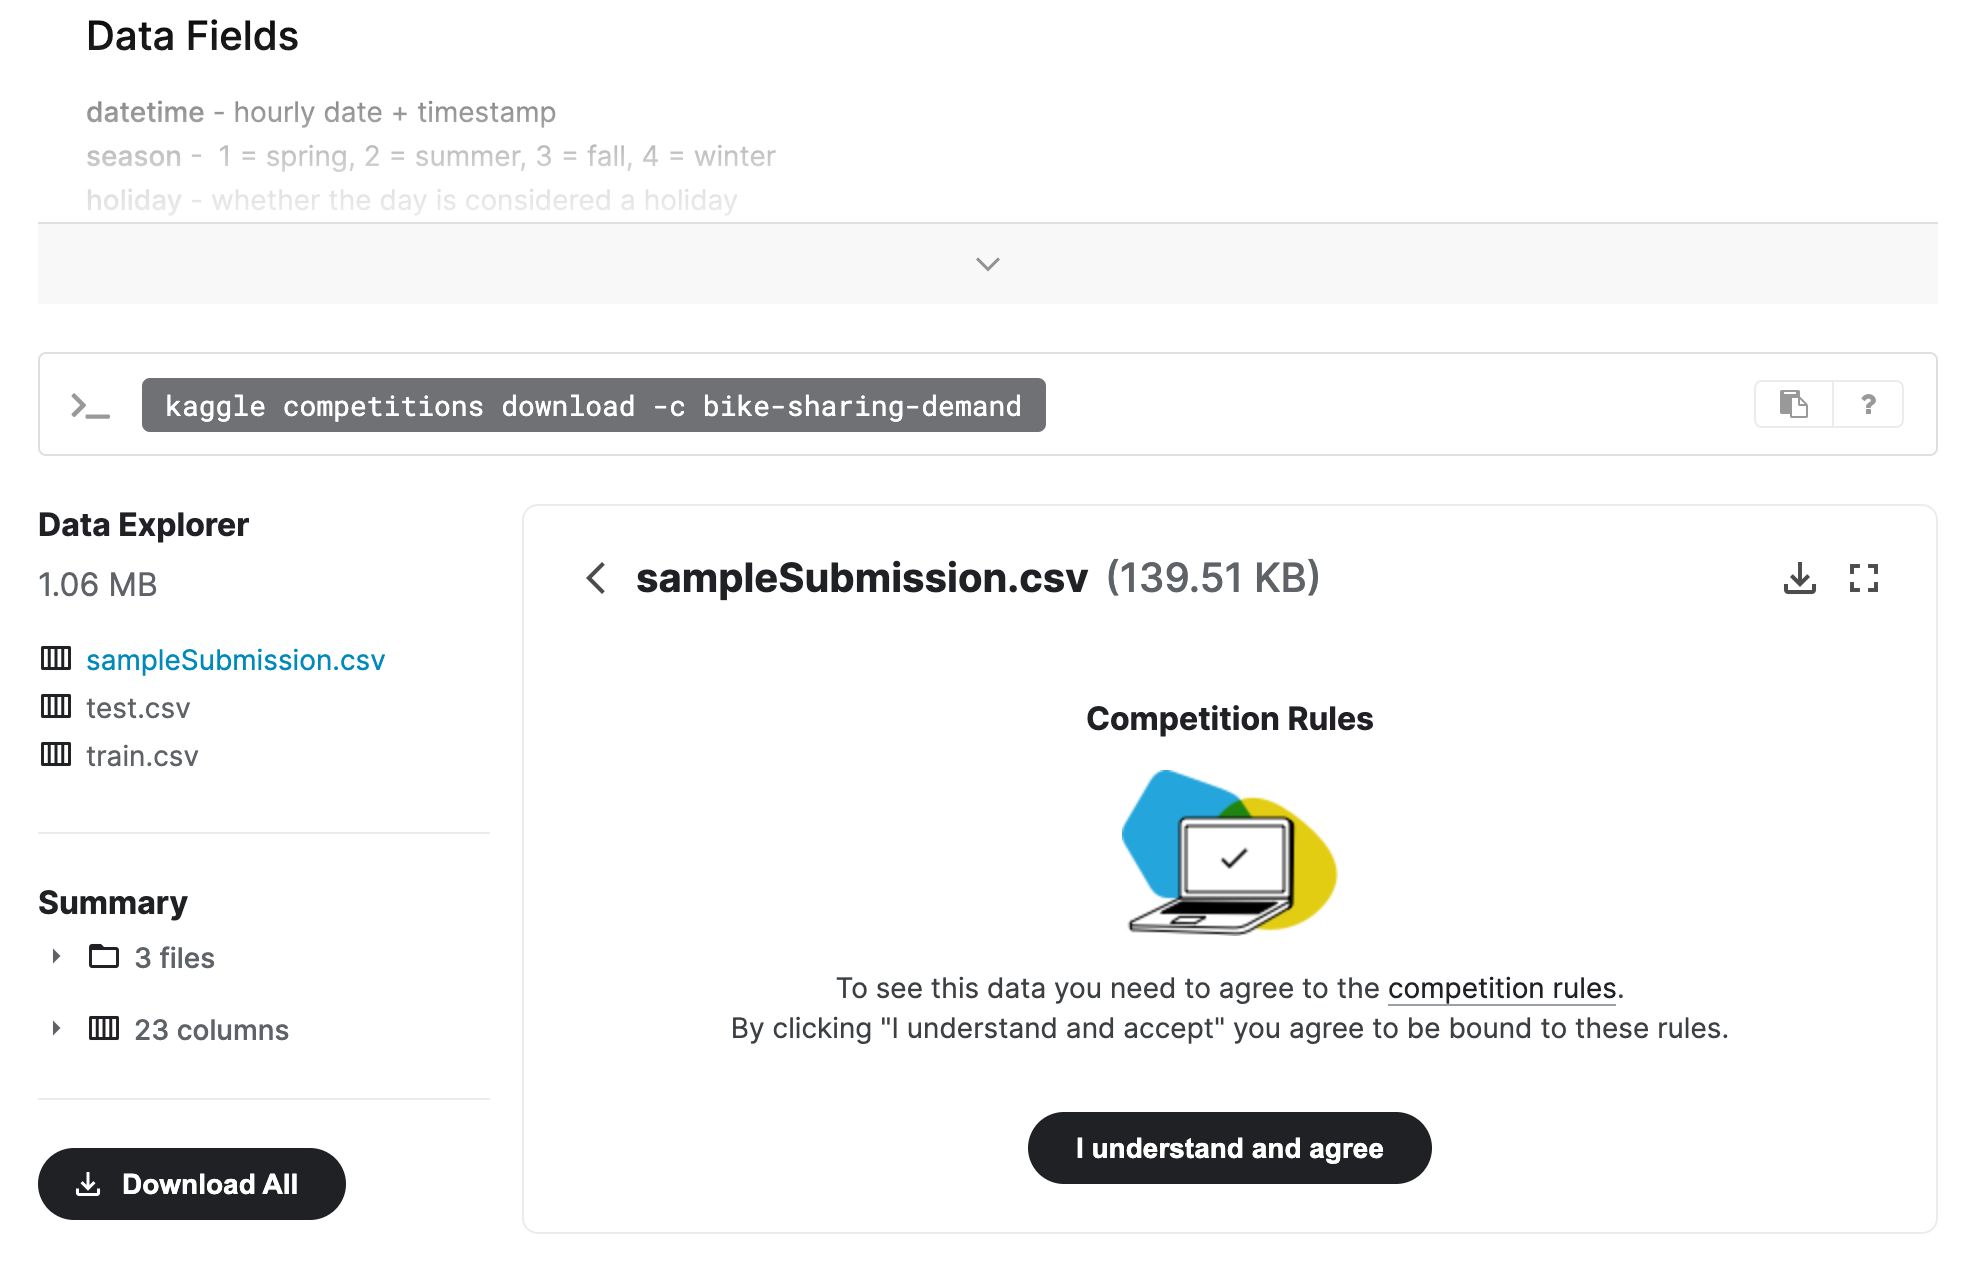

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train = train.drop(['casual', 'registered'], axis=1)
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  
0        81        0.0     16  
1        80        0.0     40  
2        80        0.0     32  
3        75        0.0     13  
4        75        0.0      1

In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      23.655084     61.886460     12.799395    191.574132  
std        8.474601     19.245033      8.164537    181.144454  
min        0.760000      0.000000      0.000000      1.000000  
25%       16.665000     47.000000      7.001500     42.000000  
50%       24.240000     62.000000     12.998000    145.000000  
75%       31.060000     77.000000     16.997900    284.000000  
max       45.455000    100.000000     56.996900    977.000000

In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [11]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
predictor = TabularPredictor(
    label='count', 
    eval_metric='root_mean_squared_error'
).fit(
    train, 
    time_limit=600, 
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230125_212307/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230125_212307/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Dec 9 09:57:03 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feat

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.leaderboard();

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.151008      10.631405  497.354838                0.000944           0.285596            3       True         14
1   RandomForestMSE_BAG_L2  -53.521283      10.312840  410.111349                0.653097          26.710818            2       True         12
2          LightGBM_BAG_L2  -55.079451       9.914367  408.478595                0.254624          25.078064            2       True         11
3          CatBoost_BAG_L2  -55.486615       9.722741  445.280360                0.062997          61.879830            2       True         13
4        LightGBMXT_BAG_L2  -60.411216      13.045293  435.618476                3.385549          52.217946            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.104108    0.029754                0.104108           0.029754            1       True    

### Create predictions from test dataset

In [50]:
predictions = predictor.predict_proba(test)
predictions.head()

0    24.439224
1    42.305702
2    45.960281
3    49.693062
4    52.062313
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [51]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.879257
std        89.870773
min         3.158860
25%        20.499058
50%        64.528862
75%       167.714935
max       363.867706
Name: count, dtype: float64

In [52]:
# How many negative values do we have?
(predictions < 0).sum().sum()

0

In [53]:
# Set them to zero
predictions.where(predictions > 0, 0, inplace=True)

### Set predictions to submission dataframe, save, and submit

In [54]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [55]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "Third raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 408kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [56]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                  status    publicScore  privateScore  
---------------------------  -------------------  -------------------------------------------  --------  -----------  ------------  
submission.csv               2023-01-25 21:52:46  Third raw submission                         complete  1.78777      1.78777       
submission_new_features.csv  2023-01-25 21:51:47  new features v2                              complete  0.63932      0.63932       
submission_new_features.csv  2023-01-25 21:47:47  new features v2                              complete  4.76188      4.76188       
submission_new_features.csv  2023-01-25 21:45:21  new features v2                              complete  4.76188      4.76188       


#### Initial score of 1.78777

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

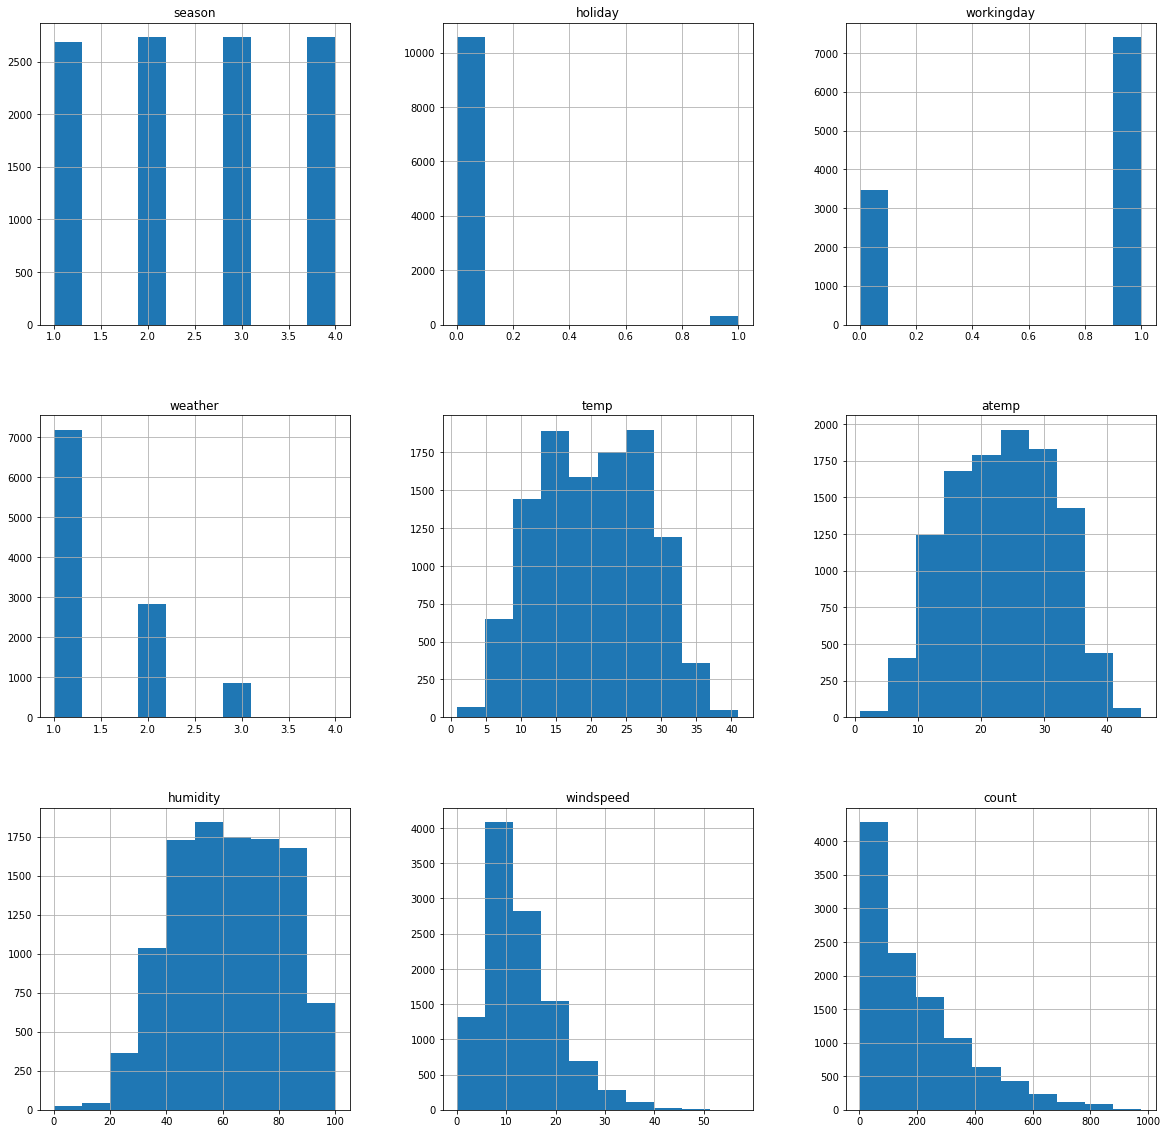

In [21]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
plt.rcParams["figure.figsize"] = (20, 20)
train.hist();

In [22]:
# create a new feature
train["year"]  = pd.to_datetime(train["datetime"]).dt.year
train["month"] = pd.to_datetime(train["datetime"]).dt.month
train["day"]   = pd.to_datetime(train["datetime"]).dt.day
train["hour"]  = pd.to_datetime(train["datetime"]).dt.hour

test["year"]   = pd.to_datetime(test["datetime"]).dt.year
test["month"]  = pd.to_datetime(test["datetime"]).dt.month
test["day"]    = pd.to_datetime(test["datetime"]).dt.day
test["hour"]   = pd.to_datetime(test["datetime"]).dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [23]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [24]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0  2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1  2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2  2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3  2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4  2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  count  year  month  day  hour  
0        81        0.0     16  2011      1    1     0  
1        80        0.0     40  2011      1    1     1  
2        80        0.0     32  2011      1    1     2  
3        75        0.0     13  2011      1    1     3  
4        75        0.0      1  2011      1    1     4

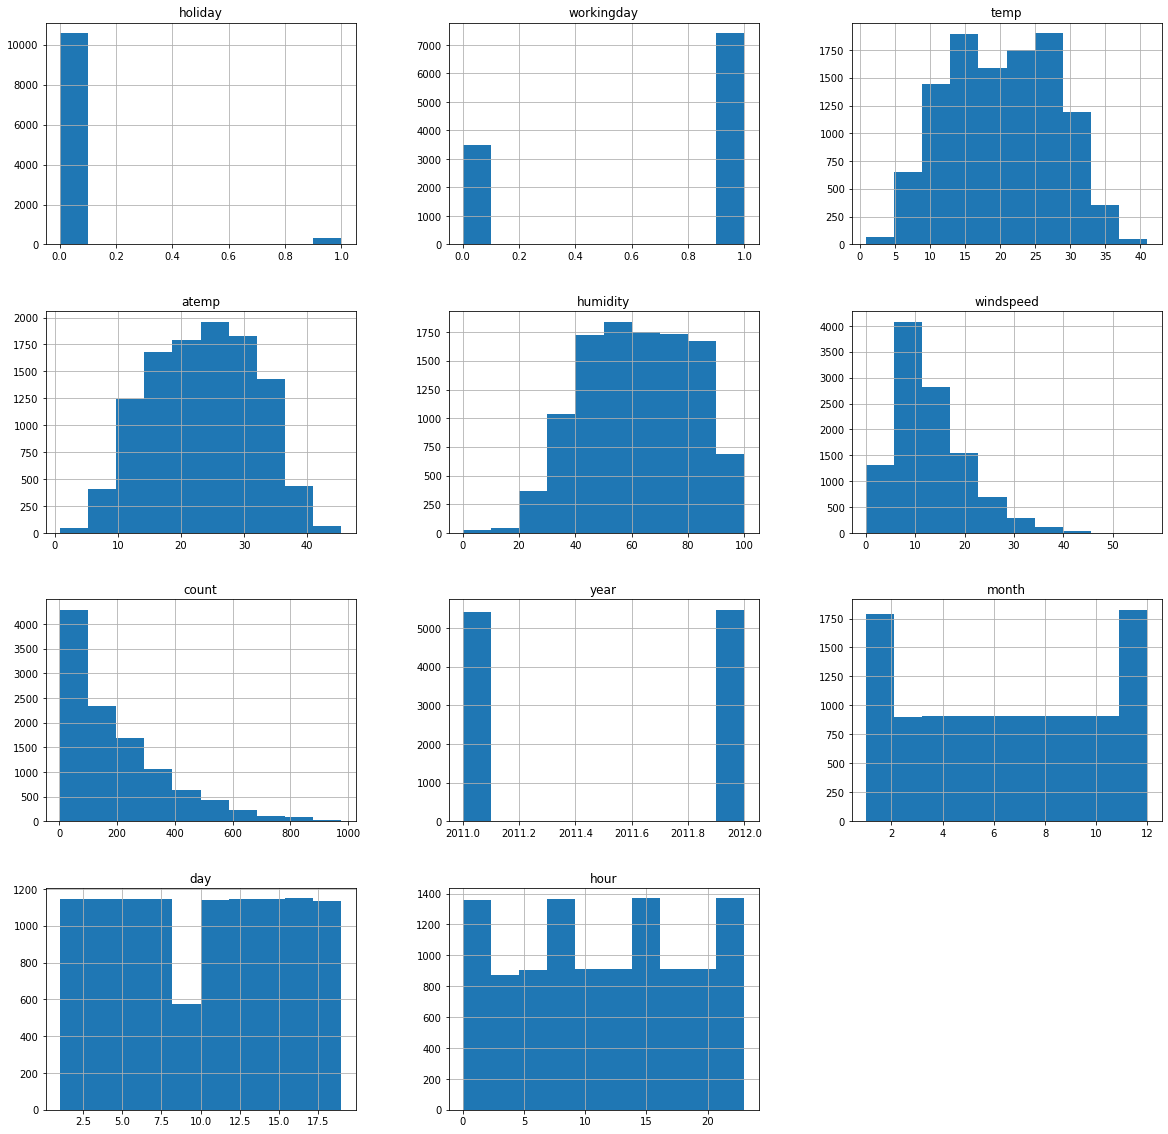

In [25]:
# View histogram of all features again now with the hour feature
plt.rcParams["figure.figsize"] = (20, 20)
train.hist();

## Step 5: Rerun the model with the same settings as before, just with more features

In [26]:
predictor_new_features = TabularPredictor(
    label='count', 
    eval_metric='root_mean_squared_error'
).fit(
    train, 
    time_limit=500, 
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230125_213613/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 500s
AutoGluon will save models to "AutogluonModels/ag-20230125_213613/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Dec 9 09:57:03 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

In [27]:
predictor_new_features.leaderboard();

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.437678      16.827717  466.899900                0.000962           0.281992            3       True         14
1          LightGBM_BAG_L2  -30.728532      15.380213  361.264401                0.244998          24.984998            2       True         11
2          CatBoost_BAG_L2  -30.887409      15.226535  381.101736                0.091321          44.822333            2       True         13
3        LightGBMXT_BAG_L2  -31.309426      15.879319  365.944732                0.744105          29.665329            2       True         10
4   RandomForestMSE_BAG_L2  -31.642055      15.746331  367.145249                0.611117          30.865846            2       True         12
5      WeightedEnsemble_L2  -32.174482      13.995952  296.728259                0.001283           0.498462            2       True    

In [43]:
predictions_new_features = predictor_new_features.predict_proba(test)

In [44]:
predictions_new_features

0        15.948767
1        11.307267
2        10.253816
3         9.295108
4         8.578350
           ...    
6488    293.588074
6489    211.358704
6490    153.027161
6491    110.597473
6492     72.005547
Name: count, Length: 6493, dtype: float32

In [45]:
# Remember to set all negative values to zero
predictions_new_features.where(predictions_new_features > 0, 0,  inplace=True);

In [46]:
predictions_new_features

0        15.948767
1        11.307267
2        10.253816
3         9.295108
4         8.578350
           ...    
6488    293.588074
6489    211.358704
6490    153.027161
6491    110.597473
6492     72.005547
Name: count, Length: 6493, dtype: float32

In [47]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [48]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features v2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 412kB/s]
Successfully submitted to Bike Sharing Demand

In [49]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                  status    publicScore  privateScore  
---------------------------  -------------------  -------------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-25 21:51:47  new features v2                              complete  0.63932      0.63932       
submission_new_features.csv  2023-01-25 21:47:47  new features v2                              complete  4.76188      4.76188       
submission_new_features.csv  2023-01-25 21:45:21  new features v2                              complete  4.76188      4.76188       
submission.csv               2023-01-25 21:33:40  first raw submission                         complete  4.76188      4.76188       


#### New Score of 0.63932

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [57]:
import autogluon.core as ag
## From autogluon documentation
nn_options = {  
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability 
}

gbm_options = {  
    'num_boost_round': 100,  # number of boosting rounds 
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees
}

xgb_options = {
    'n_estimators' : ag.space.Int(lower=100, upper=500, default=100),
    'max_depth' : ag.space.Int(lower=6, upper=10, default=6),
    'eta' : ag.space.Real(lower=0.01, upper=0.3, log=True)
}

hyperparameters = {  
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,
                   'XGB': xgb_options
                  }  

num_trials = 2  # try at most 3 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
        label="count", 
        problem_type="regression", 
        eval_metric="rmse"
    ).fit(
        train,
        time_limit=500,
        presets='best_quality', 
        hyperparameters=hyperparameters, 
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L2... Skipping this model.
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 140.53s of remaining time.
	-34.2731	 = Validation score   (-root_mean_squared_error)
	0.88s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 360.59s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230125_215436/")


In [58]:
predictor_new_hpo.leaderboard();

                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -34.081510       1.162703  113.688338                0.001101           0.393536            2       True          5
1    XGBoost_BAG_L1/T2 -34.226921       0.890288   73.596498                0.890288          73.596498            1       True          4
2  WeightedEnsemble_L3 -34.273104       1.468889  310.234817                0.001424           0.878985            3       True         10
3   LightGBM_BAG_L2/T1 -34.493893       1.466620  220.524725                0.000162          23.008731            2       True          6
4   LightGBM_BAG_L2/T2 -34.505184       1.467108  221.392260                0.000651          23.876266            2       True          7
5    XGBoost_BAG_L2/T1 -34.575574       1.466551  219.626608                0.000093          22.110613            2       True          8
6    XGBoost_BAG_L2/T2 -34.

In [59]:
predictions_new_hpo = predictor_new_hpo.predict_proba(test)
# Remember to set all negative values to zero
predictions_new_hpo.where(predictions_new_hpo > 0, 0, inplace=True)

In [60]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('sampleSubmission.csv')
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [61]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters tuning v1.1"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 383kB/s]
Successfully submitted to Bike Sharing Demand

In [62]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                    status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-25 22:01:23  new features with hyperparameters tuning v1.1  complete  0.54163      0.54163       
submission.csv               2023-01-25 21:52:46  Third raw submission                           complete  1.78777      1.78777       
submission_new_features.csv  2023-01-25 21:51:47  new features v2                                complete  0.63932      0.63932       
submission_new_features.csv  2023-01-25 21:47:47  new features v2                                complete  4.76188      4.76188       


#### New Score of 0.54163

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

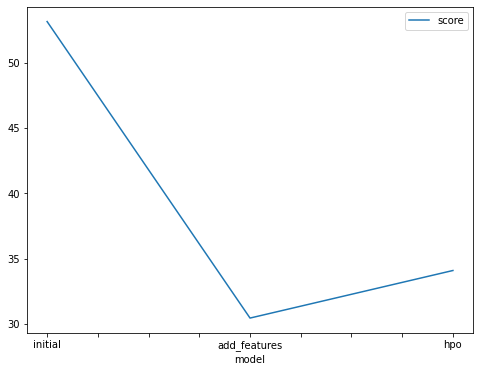

In [65]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [53.151008, 30.437678, 34.081510]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

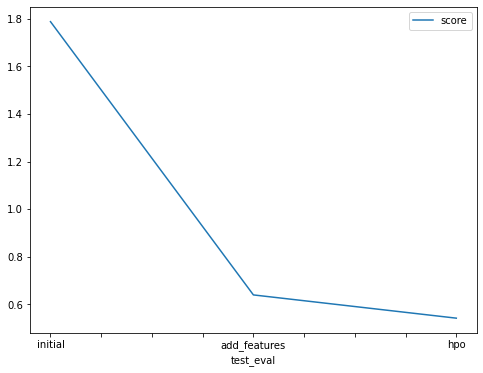

In [66]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.78777, 0.63932, 0.54163]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [68]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['default_vals', 'default_vals', 'GBM: num_leaves: lower=26, upper=66'],
    "hpo2": ['default_vals', 'default_vals', 'NN: dropout_prob: 0.0, 0.5'],
    "hpo3": ['default_vals', 'default_vals', 'XGB: num_estimators: lower=100, max=500'],
    "score": [1.78777, 0.63932, 0.54163]
})

model                                 hpo1  \
0       initial                         default_vals   
1  add_features                         default_vals   
2           hpo  GBM: num_leaves: lower=26, upper=66   

                         hpo2                                     hpo3  \
0                default_vals                             default_vals   
1                default_vals                             default_vals   
2  NN: dropout_prob: 0.0, 0.5  XGB: num_estimators: lower=100, max=500   

     score  
0  1.78777  
1  0.63932  
2  0.54163